### Introduction

We have a dataset for reviews on an applications used for schedule planning and to-dos.
As a Data Science Intern, we will perform necessary data pre-processing and analysis to get insisghts on the data. 
Final goal is to derive certain results on sentiment analysis for the reviews on the applications.
For that, let's load the data and create our dataframe :

                 

In [14]:
#libraries & packages
import  pandas as pd
import re
from math import ceil
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from nltk.corpus import sentiwordnet as swn
nltk.download('sentiwordnet')
from nltk.tokenize import word_tokenize
nltk.download('punkt')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ramak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ramak\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\ramak\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ramak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

###Reading the train data:

The first line will import the data using pandas
in the second line we will make a backup/copy of the original data to keep it as it is.

In [15]:
# read csv file
train = pd.read_csv("reviews.csv")

train_original=train.copy()
# showing data 
train.sample(5)


,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
1623,a1c553c0-8d36-4f37-9839-40222843c1d8,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Have been having issues since last update, whe...",0,14.4.1,20-01-2020 21:12,"Hi Ray, we’ve looked into it and likely fixed ...",27-01-2020 16:30,14.4.1,most_relevant,com.todoist
15457,287b6601-c76d-4d78-bdb7-fdec6fb1c9e6,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Hands down, my new favorite calendar app. And ...",27,2.35.0,24-07-2019 14:03,NaN,NaN,2.35.0,most_relevant,com.appgenix.bizcal
2805,99b39ffd-4f72-4e78-8e7b-5fd8f59e18a7,Michael Bechard,https://play-lh.googleusercontent.com/a-/ALV-U...,"Overall, the app is fine and works for me. How...",31,7.0.0.2,05-11-2023 13:28,NaN,NaN,7.0.0.2,most_relevant,com.ticktick.task
4111,22ac7c36-6037-4e67-ad2c-1877cb1c49cb,BSLizardette,https://play-lh.googleusercontent.com/a-/ALV-U...,Helped me to properly grasp how much I can act...,16,3.2.3,25-04-2021 11:16,"Hi Liskosisko, thanks so much for your review....",28-04-2021 22:01,3.2.3,most_relevant,com.habitrpg.android.habitica
14389,336805e5-d20c-48c7-a2c3-7a64d82be35e,Luke B,https://play-lh.googleusercontent.com/a/ACg8oc...,So easy to use and customise with bright colours,0,3.14.2,20-03-2024 08:41,"Hi Luke, so great to hear you're enjoying my a...",18-03-2024 15:26,3.14.2,newest,com.tasks.android


In [16]:
# Also some basic information of dataset like memory uage and data types of columns 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16787 entries, 0 to 16786
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              16787 non-null  object
 1   userName              16787 non-null  object
 2   userImage             16787 non-null  object
 3   content               16786 non-null  object
 4   thumbsUpCount         16787 non-null  int64 
 5   reviewCreatedVersion  14430 non-null  object
 6   at                    16787 non-null  object
 7   replyContent          9168 non-null   object
 8   repliedAt             9168 non-null   object
 9   appVersion            14430 non-null  object
 10  sortOrder             16787 non-null  object
 11  appId                 16787 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.5+ MB


Overview of the Training Data

In [17]:
train.head()

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,I have the same recurring tasks to do every da...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,"Instead of shopping around, I downloaded Any.d...",8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,Why does every once in a while... out of the b...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,Terrible Update! This app used to be perfect f...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,This app is deceivingly terrible. There are so...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo


In [18]:
train.tail()

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
16782,e9cebff8-82ad-4191-b196-127a65e9036d,Alexandra Grafwallner,https://play-lh.googleusercontent.com/a-/ALV-U...,Excellent app,0,6.1.4,05-07-2023 02:08,NaN,NaN,6.1.4,newest,com.appxy.planner
16783,ab74c21c-3587-4393-a53d-4cb55f3e3c9b,Ljubica Pejic,https://play-lh.googleusercontent.com/a-/ALV-U...,I love it. Easy to use. Make my life organize....,9,6.1.4,29-06-2023 15:27,NaN,NaN,6.1.4,newest,com.appxy.planner
16784,0062b15d-6e4d-4f0a-9ea6-ef9b9420d923,Kamiyah Dorsey,https://play-lh.googleusercontent.com/a/ACg8oc...,I love how I could make plans and check the ap...,0,6.1.3,28-06-2023 01:04,NaN,NaN,6.1.3,newest,com.appxy.planner
16785,85318bf2-7ca0-4d5e-8cb2-f0f18c813e4d,Keturah Pender,https://play-lh.googleusercontent.com/a/ACg8oc...,Exactly what I needed!!!,0,6.1.3,23-06-2023 13:14,NaN,NaN,6.1.3,newest,com.appxy.planner
16786,8e2deadd-1a6a-4817-89dc-4bd9a198332c,Bhagwan Singh Virik,https://play-lh.googleusercontent.com/a-/ALV-U...,Very good 👍,0,6.1.3,21-06-2023 03:16,NaN,NaN,6.1.3,newest,com.appxy.planner


###Data Preprocessing
Overview:
Data preprocessing is crucial for cleaning and transforming raw social media data 
into a format suitable for sentiment analysis. 
This documentation elaborates on various preprocessing techniques employed in this phase

Removal of Links
Lowercasing
Removal of New Lines
Removal of Extra Spaces
Removal Of Special Characters
Removal of Stopwords
Lemmatization
Stemming
Alpha Numeric Words

In [19]:
"""
Removal of Links:
Description: Links in social media text often contain irrelevant information and 
can skew sentiment analysis results. Removing links helps focus on the textual content.
"""
train_original=train.copy()
# showing data 
# Drop columns 'userImage' and 'reviewCreatedVersion' from reviewData
train_original.drop(columns=['userImage', 'reviewCreatedVersion'], axis=1, inplace=True)

# Display information about the DataFrame after dropping columns
print(train_original.head())



                               reviewId       userName  \
0  0197c118-5c6f-4a7b-894c-970023d1a350        Mar Zur   
1  94868fb5-a21d-4ef9-ab85-81b2ed3d0785   Devin Rivera   
2  825da34e-f65d-4ef3-991d-02d5291820d6  Heidi Kinsley   
3  a49c2875-651a-4c33-b79c-5813780d659e  Daniel Keller   
4  9482c75e-2e63-46ab-8c94-47273dd6a829  A Google user   

                                             content  thumbsUpCount  \
0  I have the same recurring tasks to do every da...             11   
1  Instead of shopping around, I downloaded Any.d...              8   
2  Why does every once in a while... out of the b...              6   
3  Terrible Update! This app used to be perfect f...              5   
4  This app is deceivingly terrible. There are so...             20   

                 at                                       replyContent  \
0  22-07-2020 13:13  Our team will be happy to look into it for you...   
1  08-12-2020 06:24  We are not aware of any issues with randomized...   
2 

In [20]:
import numpy as np
import pandas as pd
# Load the dataset
reviews_df = pd.read_csv("reviews.csv") 

# Print the first few rows of the dataset
print(reviews_df.head())

"""
Lowercasing:
Description: Converting all text to lowercase standardizes
the data and avoids treating the same word differently due to case differences.
"""

# Convert text to lowercase
reviews_df['content'] = reviews_df['content'].str.lower()
reviews_df['replyContent'] = reviews_df['replyContent'].str.lower()
#print(reviews_df.head())


                               reviewId       userName  \
0  0197c118-5c6f-4a7b-894c-970023d1a350        Mar Zur   
1  94868fb5-a21d-4ef9-ab85-81b2ed3d0785   Devin Rivera   
2  825da34e-f65d-4ef3-991d-02d5291820d6  Heidi Kinsley   
3  a49c2875-651a-4c33-b79c-5813780d659e  Daniel Keller   
4  9482c75e-2e63-46ab-8c94-47273dd6a829  A Google user   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ACg8oc...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.com/a/ACg8oc...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  thumbsUpCount  \
0  I have the same recurring tasks to do every da...             11   
1  Instead of shopping around, I downloaded Any.d...              8   
2  Why does every once in a while... out of the b...              6   
3  Terrible Update! This app u

In [21]:

reviews_df.shape


(16787, 12)

In [22]:
"""Removal of Newlines (\n):
Newlines or line breaks disrupt the continuity of text and can affect the analysis. 
Removing them ensures the text is properly formatted."""

reviews_df['content'] = reviews_df['content'].replace('\n', ' ')
reviews_df['replyContent'] = reviews_df['replyContent'].replace('\n', ' ')

# Print the first few rows to verify the changes
print(reviews_df.head())


                               reviewId       userName  \
0  0197c118-5c6f-4a7b-894c-970023d1a350        Mar Zur   
1  94868fb5-a21d-4ef9-ab85-81b2ed3d0785   Devin Rivera   
2  825da34e-f65d-4ef3-991d-02d5291820d6  Heidi Kinsley   
3  a49c2875-651a-4c33-b79c-5813780d659e  Daniel Keller   
4  9482c75e-2e63-46ab-8c94-47273dd6a829  A Google user   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ACg8oc...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.com/a/ACg8oc...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  thumbsUpCount  \
0  i have the same recurring tasks to do every da...             11   
1  instead of shopping around, i downloaded any.d...              8   
2  why does every once in a while... out of the b...              6   
3  terrible update! this app u

In [23]:
"""
Removal of Extra Spaces:
Description: Extra spaces between words can introduce noise and affect tokenization.
Removing extra spaces ensures uniformity in text formatting.
"""

# Remove extra spaces
reviews_df['content'] = reviews_df['content'].str.replace(' +', ' ')
reviews_df['replyContent'] = reviews_df['replyContent'].str.replace(' +', ' ')

# Print the first few rows to verify the changes
print(reviews_df.head())


                               reviewId       userName  \
0  0197c118-5c6f-4a7b-894c-970023d1a350        Mar Zur   
1  94868fb5-a21d-4ef9-ab85-81b2ed3d0785   Devin Rivera   
2  825da34e-f65d-4ef3-991d-02d5291820d6  Heidi Kinsley   
3  a49c2875-651a-4c33-b79c-5813780d659e  Daniel Keller   
4  9482c75e-2e63-46ab-8c94-47273dd6a829  A Google user   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ACg8oc...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.com/a/ACg8oc...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  thumbsUpCount  \
0  i have the same recurring tasks to do every da...             11   
1  instead of shopping around, i downloaded any.d...              8   
2  why does every once in a while... out of the b...              6   
3  terrible update! this app u

In [24]:
"""
Removal of Special Characters:
Description: Special characters like punctuation marks and symbols can be noise in the text data
and should be removed.
"""

# Remove special characters
reviews_df['content'] = reviews_df['content'].str.replace(r'[^\w\s]', '')
reviews_df['replyContent'] = reviews_df['replyContent'].str.replace(r'[^\w\s]', '')

# Print the first few rows to verify the changes
print(reviews_df.head())


                               reviewId       userName  \
0  0197c118-5c6f-4a7b-894c-970023d1a350        Mar Zur   
1  94868fb5-a21d-4ef9-ab85-81b2ed3d0785   Devin Rivera   
2  825da34e-f65d-4ef3-991d-02d5291820d6  Heidi Kinsley   
3  a49c2875-651a-4c33-b79c-5813780d659e  Daniel Keller   
4  9482c75e-2e63-46ab-8c94-47273dd6a829  A Google user   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ACg8oc...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.com/a/ACg8oc...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  thumbsUpCount  \
0  i have the same recurring tasks to do every da...             11   
1  instead of shopping around, i downloaded any.d...              8   
2  why does every once in a while... out of the b...              6   
3  terrible update! this app u

In [25]:
"""
Removal of Stopwords:
Description: Stopwords are common words like "is", "the", "and"
that do not contribute significant meaning to sentiment analysis and can be removed.
"""
# Function to remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in str(text).split() if word.lower() not in stop_words])

# Apply the function to the 'content' and 'replyContent' columns
reviews_df['content'] = reviews_df['content'].apply(remove_stopwords)
reviews_df['replyContent'] = reviews_df['replyContent'].apply(remove_stopwords)

# Print the first few rows to verify the changes
print(reviews_df.head())


                               reviewId       userName  \
0  0197c118-5c6f-4a7b-894c-970023d1a350        Mar Zur   
1  94868fb5-a21d-4ef9-ab85-81b2ed3d0785   Devin Rivera   
2  825da34e-f65d-4ef3-991d-02d5291820d6  Heidi Kinsley   
3  a49c2875-651a-4c33-b79c-5813780d659e  Daniel Keller   
4  9482c75e-2e63-46ab-8c94-47273dd6a829  A Google user   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ACg8oc...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.com/a/ACg8oc...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  thumbsUpCount  \
0  recurring tasks every day. need to-do-list rem...             11   
1  instead shopping around, downloaded any.do wid...              8   
2  every while... blue, app asks update acct emai...              6   
3  terrible update! app used p

In [26]:
"""
Lemmatization:
Description: Lemmatization is a more sophisticated technique than stemming, 
which reduces words to their dictionary form (lemma).
"""
# Create a lemmatizer object
from nltk.stem import WordNetLemmatizer
import numpy as np
import pandas as pd
# Load the dataset
reviews_df = pd.read_csv("reviews.csv") 

# Create a lemmatizer object
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'content' column
reviews_df['content'] = reviews_df['content'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in str(x).split()]))
reviews_df['content'] = reviews_df['content'].astype('string')

# Print the first few rows to verify the changes
print(reviews_df.head())





                               reviewId       userName  \
0  0197c118-5c6f-4a7b-894c-970023d1a350        Mar Zur   
1  94868fb5-a21d-4ef9-ab85-81b2ed3d0785   Devin Rivera   
2  825da34e-f65d-4ef3-991d-02d5291820d6  Heidi Kinsley   
3  a49c2875-651a-4c33-b79c-5813780d659e  Daniel Keller   
4  9482c75e-2e63-46ab-8c94-47273dd6a829  A Google user   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ACg8oc...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.com/a/ACg8oc...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  thumbsUpCount  \
0  I have the same recurring task to do every day...             11   
1  Instead of shopping around, I downloaded Any.d...              8   
2  Why doe every once in a while... out of the bl...              6   
3  Terrible Update! This app u

In [27]:

"""
 Removal of Words Containing Numbers:
Description: Words containing numbers may not contribute meaningful information to 
sentiment analysis and can be safely removed.
"""

import pandas as pd

# Load the dataset
reviews_df = pd.read_csv("reviews.csv") 

# Remove alpha-numeric words from the 'content' column
reviews_df['content'] = reviews_df['content'].apply(lambda x: ' '.join([word for word in str(x).split() if not any(char.isdigit() for char in str(word))]))
reviews_df['content'] = reviews_df['content'].astype('string')

# Print the first few rows to verify the changes
print(reviews_df.head())


                               reviewId       userName  \
0  0197c118-5c6f-4a7b-894c-970023d1a350        Mar Zur   
1  94868fb5-a21d-4ef9-ab85-81b2ed3d0785   Devin Rivera   
2  825da34e-f65d-4ef3-991d-02d5291820d6  Heidi Kinsley   
3  a49c2875-651a-4c33-b79c-5813780d659e  Daniel Keller   
4  9482c75e-2e63-46ab-8c94-47273dd6a829  A Google user   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ACg8oc...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.com/a/ACg8oc...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  thumbsUpCount  \
0  I have the same recurring tasks to do every da...             11   
1  Instead of shopping around, I downloaded Any.d...              8   
2  Why does every once in a while... out of the b...              6   
3  Terrible Update! This app u

In [28]:
from nltk.stem import PorterStemmer
import pandas as pd

# Load the dataset
reviews_df = pd.read_csv("reviews.csv") 

# Create a stemmer object
stemmer = PorterStemmer()

# Function to apply stemming
def apply_stemming(text):
    if isinstance(text, str):
        return ' '.join([stemmer.stem(word) for word in text.split()])
    else:
        return ''

# Apply stemming to the 'content' and 'replyContent' columns
reviews_df['content'] = reviews_df['content'].apply(apply_stemming)
reviews_df['replyContent'] = reviews_df['replyContent'].apply(apply_stemming)

# Print the first few rows to verify the changes
print(reviews_df.head())


                               reviewId       userName  \
0  0197c118-5c6f-4a7b-894c-970023d1a350        Mar Zur   
1  94868fb5-a21d-4ef9-ab85-81b2ed3d0785   Devin Rivera   
2  825da34e-f65d-4ef3-991d-02d5291820d6  Heidi Kinsley   
3  a49c2875-651a-4c33-b79c-5813780d659e  Daniel Keller   
4  9482c75e-2e63-46ab-8c94-47273dd6a829  A Google user   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ACg8oc...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.com/a/ACg8oc...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  thumbsUpCount  \
0  i have the same recur task to do everi day. i ...             11   
1  instead of shop around, i download any.do beca...              8   
2  whi doe everi onc in a while... out of the blu...              6   
3  terribl update! thi app use

### Data Visualization:
### We will visualize the data using WordCloud
### Word Cloud
For initial plotting of words, we would visualize frequency of words in text data by comparing relative size based on their count

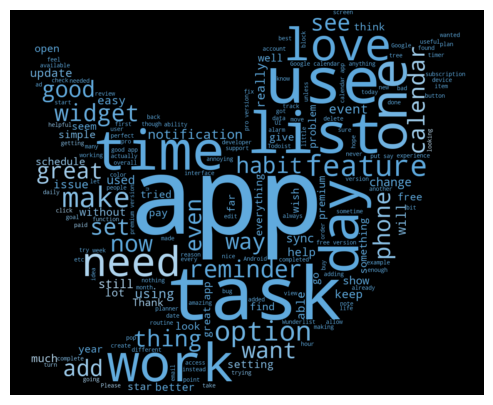

In [37]:
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
import pandas as pd

def generate_word_cloud(data, column_name, mask_image_path, width=800, height=400):
    """
    Generate a word cloud from text data in the specified column of a DataFrame,
    using an image as the mask for the word cloud.
    
    Args:
    - data: DataFrame containing the text data
    - column_name: Name of the column containing the text data
    - mask_image_path: Path to the image file to be used as the mask
    - width: Width of the word cloud figure     - height: Height of the word cloud figure     
    Returns:
    - None
    """
    # Load the mask image
    mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))


    # Concatenate all text data into a single string
    text_data = " ".join(data[column_name].dropna())

    # Generate word cloud
    wordcloud = WordCloud(width=width, height=height, mask=mask).generate(text_data)

    # Create coloring from image
    image_colors = ImageColorGenerator(mask)
    
    # Display word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")
    #plt.title("Word Cloud for " + column_name)
    plt.show()

# Usage example
import pandas as pd

# Load the dataset or define the dataframe
reviews_df = pd.read_csv("reviews.csv") 


# Now you can call the generate_word_cloud function
generate_word_cloud(reviews_df, 'content', 'mask_image.png')




### To create a bar chart showing word frequencies, we can follow these steps:

Tokenize the text into words.
Count the frequency of each word.
Plot the word frequencies using a bar chart.


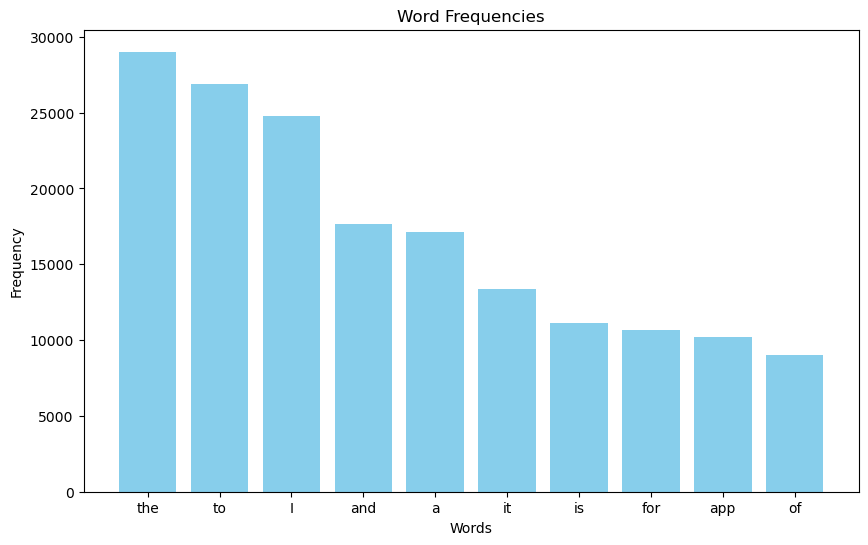

In [30]:

from collections import Counter
import matplotlib.pyplot as plt

def plot_word_frequencies(text_data, num_words=10):
    """
    Plot the frequencies of the most common words in the text data using a bar chart.
    
    Args:
    - text_data: String containing the text data
    - num_words: Number of most common words to plot
    
    Returns:
    - None
    """
    # Tokenize the text into words
    words = text_data.split()

    # Count the frequency of each word
    word_counts = Counter(words)

    # Get the most common words and their frequencies
    most_common_words = word_counts.most_common(num_words)
    words, frequencies = zip(*most_common_words)

    # Plot the word frequencies using a bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Word Frequencies')
    #plt.xticks(rotation=45, ha='right')
    plt.show()


text_data = " ".join(reviews_df['content'].dropna())  

plot_word_frequencies(text_data, num_words=10)


### the most common words and their frequencies of each word

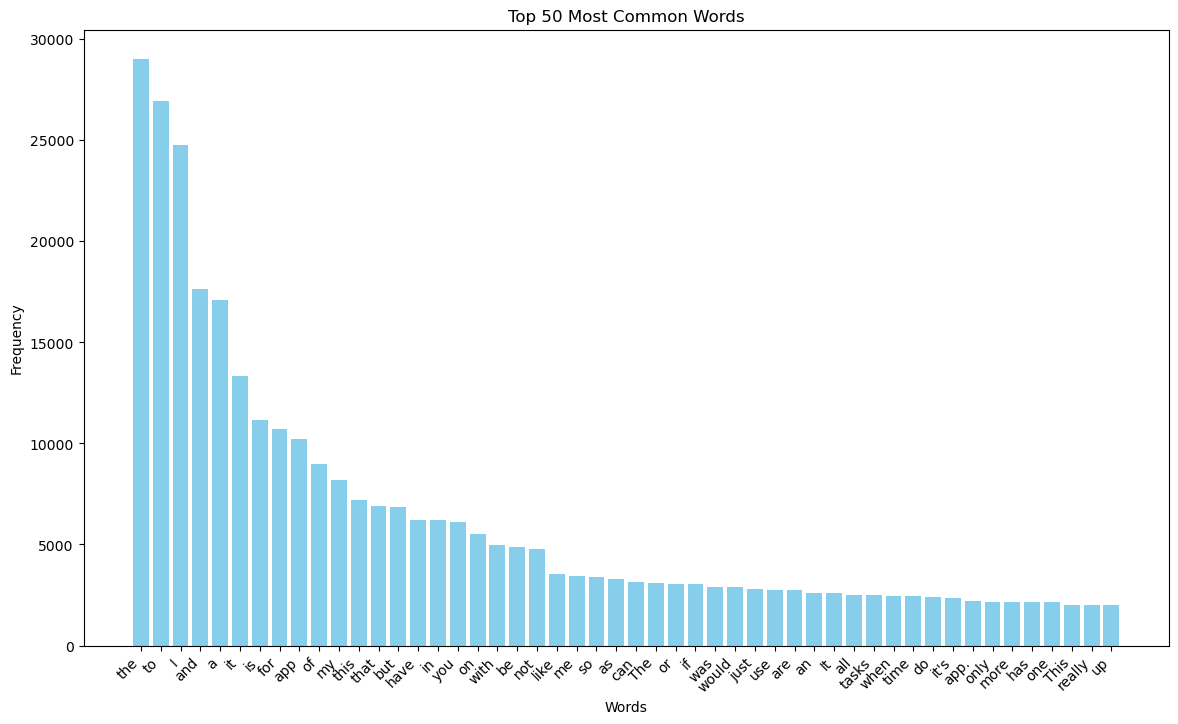

In [38]:
from collections import Counter
import matplotlib.pyplot as plt

def plot_word_frequencies(text_data, num_words=10):
    """
    Plot the frequencies of the most common words in the text data using a bar chart.
    
    Args:
    - text_data: String containing the text data
    - num_words: Number of most common words to plot 
    
    Returns:
    - None
    """
    # Tokenize the text into words
    words = text_data.split()

    # Count the frequency of each word
    word_counts = Counter(words)

    # Get the most common words and their frequencies
    most_common_words = word_counts.most_common(num_words)
    words, frequencies = zip(*most_common_words)

    # Plot the word frequencies using a bar chart
    plt.figure(figsize=(14, 8))
    plt.bar(words, frequencies, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Top {} Most Common Words'.format(num_words))
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Usage example
text_data = " ".join(reviews_df['content'].dropna())  
# Assuming reviews_df is our DataFrame
plot_word_frequencies(text_data, num_words=50)


### Plot a histogram of text lengths in the specified column of a DataFrame.


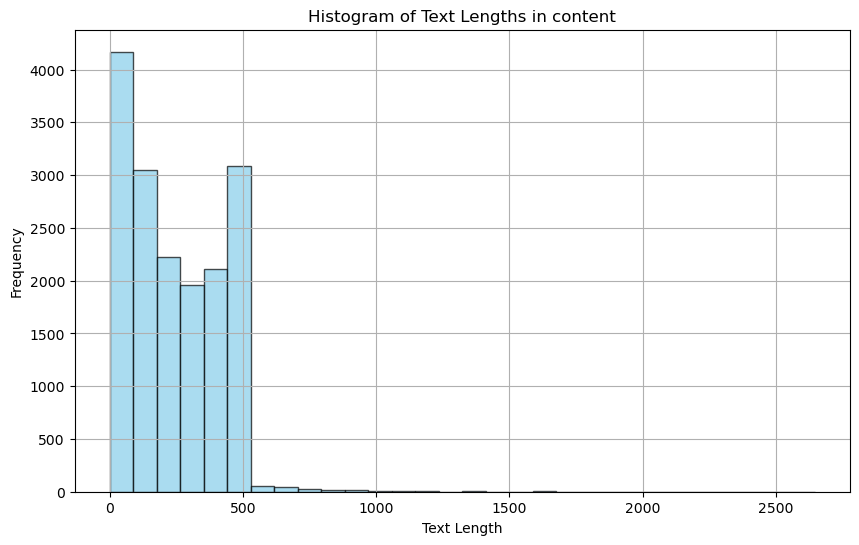

In [39]:
import matplotlib.pyplot as plt

def plot_text_length_histogram(data, column_name):
    """
    
    
    Args:
    - data: DataFrame containing the text data
    - column_name: Name of the column containing the text data
    
    Returns:
    - None
    """
    # Calculate the length of each text in the specified column
    text_lengths = data[column_name].str.len()

    # Plot the histogram of text lengths
    plt.figure(figsize=(10, 6))
    plt.hist(text_lengths, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.title('Histogram of Text Lengths in {}'.format(column_name))
    plt.grid(True)
    plt.show()

# Usage example
plot_text_length_histogram(reviews_df, 'content')


### Maximum length of text in the content column

In [40]:
def max_text_length(data, column_name):
    """
    Find the maximum text length in the specified column of a DataFrame.
    
    Args:
    - data: DataFrame containing the text data
    - column_name: Name of the column containing the text data
    
    Returns:
    - max_length: Maximum length of text in the specified column
    """
    # Calculate the length of each text in the specified column
    text_lengths = data[column_name].str.len()
    
    # Find the maximum text length
    max_length = text_lengths.max()
    
    return max_length

max_length = max_text_length(reviews_df, 'content')
print("Maximum text length:", max_length)


Maximum text length: 2645.0


### Sentiment Distribution of Reviews with using basic Keywords showing Pie chart

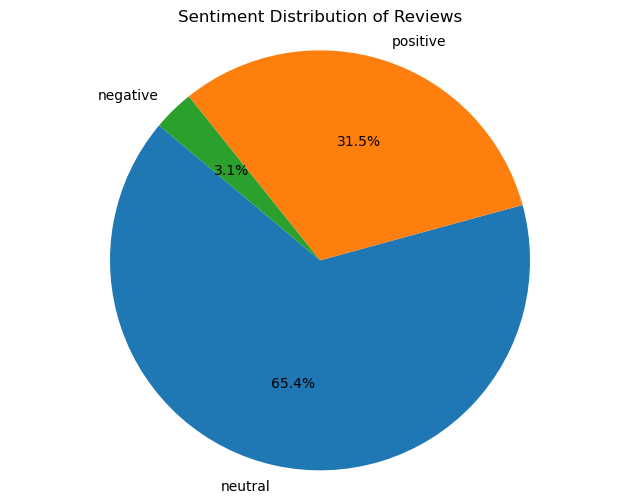

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("reviews.csv")

# Drop rows with missing values in the "content" column
df.dropna(subset=['content'], inplace=True)

# Extract the "content" column
content_column = df["content"]
def determine_sentiment(text):
    # Your logic to determine sentiment
    positive_keywords = ["good", "excellent", "great", "awesome", "amazing", "fantastic", "superb", "wonderful", "outstanding"]
    neutral_keywords = ["ok", "average", "fine", "decent", "satisfactory", "acceptable", "fair"]
    negative_keywords = ["bad", "poor", "terrible", "horrible", "awful", "disappointing", "unsatisfactory", "subpar", "lousy"]
    
    # Count occurrences of positive, neutral, and negative keywords
    num_positive = sum(1 for word in positive_keywords if word in text.lower())
    num_neutral = sum(1 for word in neutral_keywords if word in text.lower())
    num_negative = sum(1 for word in negative_keywords if word in text.lower())
    
    # Adjust sentiment weights
    num_positive *= 1.5  # Increase weight for positive sentiment
    num_neutral *= 0.5  # Decrease weight for neutral sentiment
    
    # Determine sentiment
    if num_positive > 35 or (num_positive > num_neutral and num_positive > num_negative):
        return "positive"
    elif num_negative > num_positive and num_negative > num_neutral:
        return "negative"
    else:
        return "neutral"

# Apply sentiment analysis to each review
sentiments = content_column.apply(determine_sentiment)

# Count occurrences of each sentiment
sentiment_counts = sentiments.value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Reviews')
print()
plt.axis('equal')  
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


### Extracting Postive words based on keywords

In [42]:
import pandas as pd

# Load the dataset
df = pd.read_csv("reviews.csv")

# Drop rows with missing values in the "content" column
df.dropna(subset=['content'], inplace=True)

# Extract the "content" column
content_column = df["content"]

# Function to extract positive words from each review
def extract_positive_words(text):
    positive_keywords = ["good", "excellent", "great", "awesome", "amazing"]
    
    # Extract positive words
    positive_words = [word for word in positive_keywords if word in text.lower()]
    
    return positive_words

# Apply function to extract positive words to each review
df['positive_words'] = content_column.apply(extract_positive_words)

# Unnest the list of positive words
df = df.explode('positive_words')

# Reset index
df.reset_index(drop=True, inplace=True)

# Show the DataFrame with unnested positive words
print(df[['content', 'positive_words']])


                                                 content positive_words
0      I have the same recurring tasks to do every da...            NaN
1      Instead of shopping around, I downloaded Any.d...            NaN
2      Why does every once in a while... out of the b...            NaN
3      Terrible Update! This app used to be perfect f...            NaN
4      This app is deceivingly terrible. There are so...            NaN
...                                                  ...            ...
17267                                      Excellent app      excellent
17268  I love it. Easy to use. Make my life organize....           good
17269  I love how I could make plans and check the ap...            NaN
17270                           Exactly what I needed!!!            NaN
17271                                        Very good 👍           good

[17272 rows x 2 columns]


#### Plot bar plot for positive sentiment

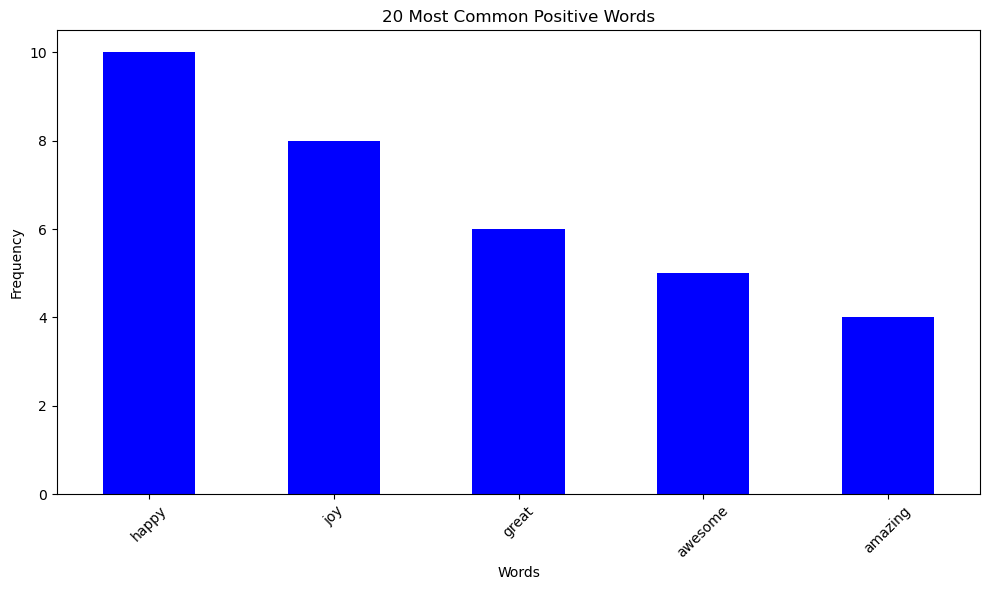

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming positive_word_counts is a dictionary containing word counts
positive_word_counts = {"happy": 10, "joy": 8, "great": 6, "awesome": 5, "amazing": 4}

# Convert the dictionary to a pandas Series
positive_word_counts_series = pd.Series(positive_word_counts)

# Plot bar plot for positive sentiment
plt.figure(figsize=(10, 6))
positive_word_counts_series.plot(kind='bar', color='blue')
plt.title('20 Most Common Positive Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Extracting Negative words based on keywords

In [44]:
import pandas as pd

# Load the dataset
df = pd.read_csv("reviews.csv")

# Drop rows with missing values in the "content" column
df.dropna(subset=['content'], inplace=True)

# Extract the "content" column
content_column = df["content"]

# Function to extract negative words from each review
def extract_negative_words(text):
    negative_keywords = ["bad", "poor", "terrible", "horrible", "awful"]
    
    # Extract negative words
    negative_words = [word for word in negative_keywords if word in text.lower()]
    
    return negative_words

# Apply function to extract negative words to each review
df['negative_words'] = content_column.apply(extract_negative_words)

# Unnest the list of negative words
df = df.explode('negative_words')

# Reset index
df.reset_index(drop=True, inplace=True)

# Show the DataFrame with unnested negative words
print(df[['content', 'negative_words']])


                                                 content negative_words
0      I have the same recurring tasks to do every da...            NaN
1      Instead of shopping around, I downloaded Any.d...            NaN
2      Why does every once in a while... out of the b...            NaN
3      Terrible Update! This app used to be perfect f...       terrible
4      This app is deceivingly terrible. There are so...       terrible
...                                                  ...            ...
16806                                      Excellent app            NaN
16807  I love it. Easy to use. Make my life organize....            NaN
16808  I love how I could make plans and check the ap...            NaN
16809                           Exactly what I needed!!!            NaN
16810                                        Very good 👍            NaN

[16811 rows x 2 columns]


### Plot bar plot for negative sentiment for 20 Most Common Negative Words

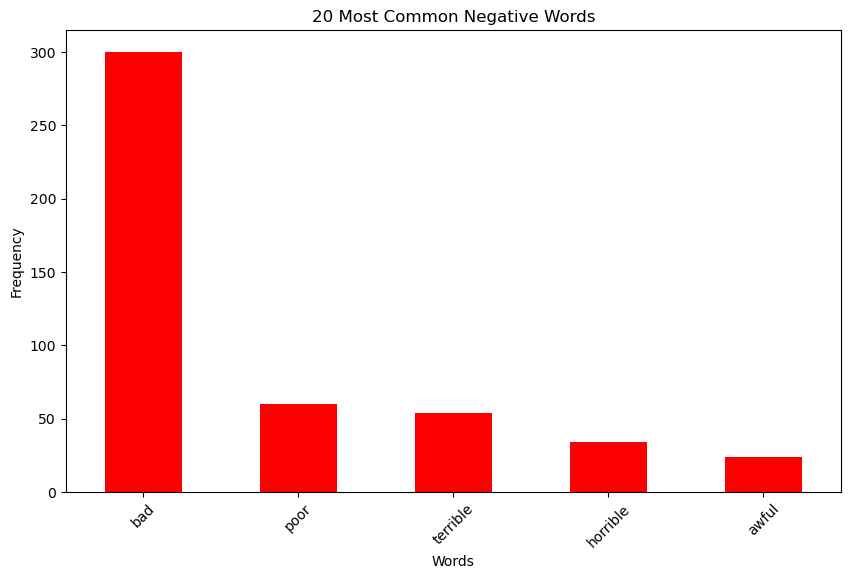

Negative Word Frequencies:
bad         300
poor         60
terrible     54
horrible     34
awful        24
dtype: int64


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Load the dataset
df = pd.read_csv("reviews.csv")

# Drop rows with missing values in the "content" column
df.dropna(subset=['content'], inplace=True)

# Extract the "content" column
content_column = df["content"]

# Define negative keywords
negative_keywords = ["bad", "poor", "terrible", "horrible", "awful"]

# Function to count word frequencies for negative sentiment
def count_negative_word_frequencies(text, keywords):
    words = text.lower().split()
    word_counts = Counter(words)
    frequencies = {keyword: word_counts[keyword] for keyword in keywords}
    return frequencies

# Count word frequencies for negative sentiment
df['negative_word_frequencies'] = content_column.apply(lambda x: count_negative_word_frequencies(x, negative_keywords))

# Extract word frequencies for negative sentiment
negative_words_df = pd.DataFrame(df['negative_word_frequencies'].tolist())

# Sum word frequencies across all reviews
negative_word_counts = negative_words_df.sum().sort_values(ascending=False)[:20]

# Plot bar plot for negative sentiment
negative_word_counts.plot(kind='bar', figsize=(10, 6), color='red')
plt.title('20 Most Common Negative Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Display the DataFrame of most frequently used negative words
print("Negative Word Frequencies:")
print(negative_word_counts)


### Extracting neutral Words with using keywords

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("reviews.csv")

# Drop rows with missing values in the "content" column
df.dropna(subset=['content'], inplace=True)

# Extract the "content" column
content_column = df["content"]

# Function to extract neutral words from each review
def extract_neutral_words(text):
    # Define neutral keywords (common words that are neither strongly positive nor strongly negative)
    neutral_keywords = ["this", "is", "was", "the", "a", "an", "I", "you", "we", "they", "it", "that", "are", "with"]
    
    # Extract neutral words
    neutral_words = [word for word in neutral_keywords if word in text.lower()]
    
    return neutral_words

# Apply function to extract neutral words to each review
df['neutral_words'] = content_column.apply(extract_neutral_words)

# Unnest the list of neutral words
df = df.explode('neutral_words')

# Reset index
df.reset_index(drop=True, inplace=True)

# Show the DataFrame with unnested neutral words
print(df[['content', 'neutral_words']])


### bar plot for neutral word frequencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Load the dataset
df = pd.read_csv("reviews.csv").dropna(subset=['content'])

# Extract the "content" column
content_column = df["content"]

# Define neutral keywords
neutral_keywords = ["this", "is", "was", "the", "a", "an", "I", "you", "we", "they", "it", "that", "are", "with"]

# Function to count word frequencies for neutral words
def count_neutral_word_frequencies(text, keywords):
    words = text.lower().split()
    return Counter(words)

# Count word frequencies for neutral words
neutral_word_counts = content_column.apply(lambda x: count_neutral_word_frequencies(x, neutral_keywords)).sum().most_common(20)

# Create DataFrame for neutral word frequencies
neutral_word_counts_df = pd.DataFrame(neutral_word_counts, columns=['Word', 'Frequency'])

# Plot bar plot for neutral word frequencies
plt.figure(figsize=(10, 6))
plt.bar(neutral_word_counts_df['Word'], neutral_word_counts_df['Frequency'], color='green')
plt.title('20 Most Common Neutral Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display the DataFrame of most frequently used neutral words
print("Neutral Word Frequencies:")
print(neutral_word_counts_df)


### Sentiment Analysis Using Text Blob
TextBlob is a Python library that provides simple API access to perform common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation

In [ ]:
!pip install textblob

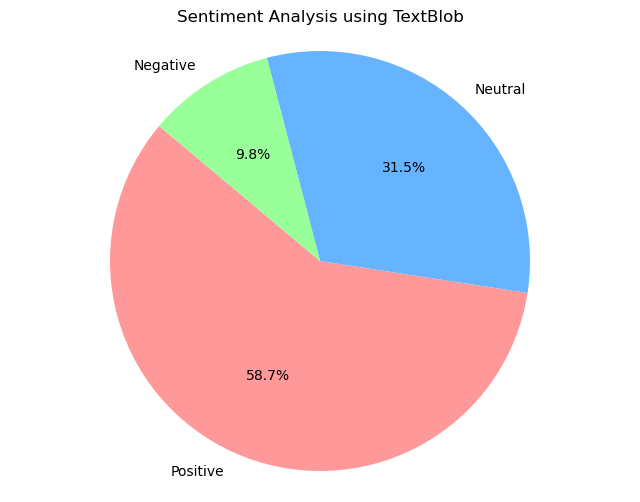

In [53]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('reviews.csv')  # Replace 'reviews.csv' with your actual dataset file path

# Perform sentiment analysis for each text in the 'content' column
sentiment_scores = df['content'].apply(lambda text: TextBlob(str(text)).sentiment.polarity)

# Categorize sentiment based on adjusted thresholds
sentiment_distribution = pd.cut(sentiment_scores, bins=[-1, -0.1, 0.1, 1], labels=['Negative', 'Neutral', 'Positive'])\
    .value_counts()

# Pie chart
labels = sentiment_distribution.index
sizes = sentiment_distribution.values
colors = ['#ff9999', '#66b3ff', '#99ff99']
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Analysis using TextBlob')
plt.axis('equal')
plt.show()
